In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 



In [ ]:
#load the contents of a file into a pandas Dataframe

input_file = './titanic/train.csv'
df_titanic = pd.read_csv(input_file)

In [10]:
#Get information of the no. of rows and columns
df_titanic.shape

(891, 12)

The dataframe has 891 rows and 12 columns

In [11]:
#titles of the 12 columns
print (df_titanic.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Let us check if there are missing values in the columns
You can either use .info() or isnull().sum()

In [12]:
#How many missing values?
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on the above data, there are 177 missing values in age, cabin 687, and embarked 2 are missing. 

In [13]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Does this dataframe have a named index? if so, what is it?
print (df_titanic.index.name)

None


The dataframe has no index and then I will make the PassengerId as an attribute of the dataframe. 

In [15]:
df_titanic.set_index("PassengerId", inplace=True)

In [16]:
# Does this dataframe have a named index? if so, what is it?
print (df_titanic.index.name)

PassengerId


As we have made the PassengerId as an index, let us check the remaining columns and their titles

In [17]:
df_titanic.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# how many rows and columns in the dataframe
# after the index has been set?
df_titanic.shape

(891, 11)

the number of columns has changed to 11 now. 

#### Extracting the target variable from the dataset and placing it into another dataset
When training the dataset, one needs to seperate target variable as one of the input features. 
We are going to do the same on this dataset and place it into a seperate dataframe with the other feature variables


In [19]:
# extract the target attribute into its own dataframe
df_titanic_target = df_titanic.loc[:,['Survived']]

# create a dataframe that contains the 10 feature variables
df_titanic_features = df_titanic.drop(['Survived'], axis=1)

The Survived attribute is a binary attribute in which a value of 1 implies that the individual survived

In [20]:
# what is the split between the two classes of the target variable?
df_titanic_target['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

array([[<Axes: title={'center': 'Survived'}>]], dtype=object)

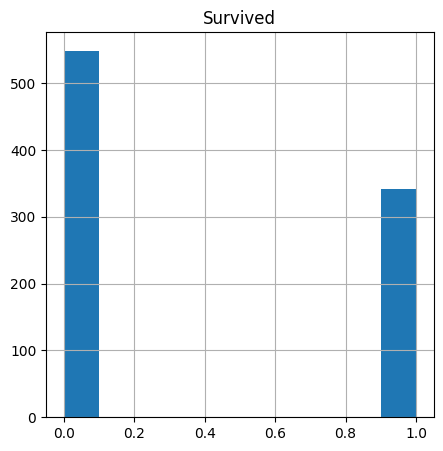

In [23]:
# visual presentation of those who survived or not 
# histogram of target variable 
df_titanic_target.hist(figsize=(5,5))


Above is the visual representation of the people who survived and those who died in the Titanic. 
Based on the histogram, majority of the people died (Survived=No=0) compared to those who survived. 

In [21]:
# unique values and counts of categorical attribute 'Embarked'
# Include NaN markers 
df_titanic_features['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

The above code uses value_counts to include also NaN values. Basically, tthe function does not pick NaN values which we have to program it to by using dropna=False

array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >]], dtype=object)

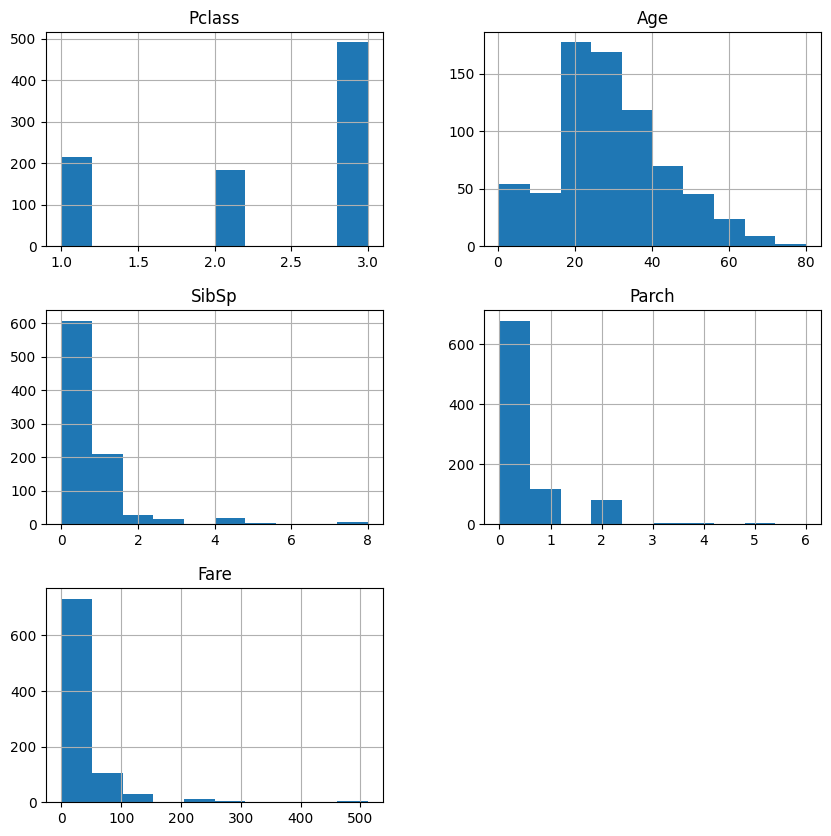

In [24]:
#histogram of features
df_titanic_features.hist(figsize=(10,10))

Analysis of the above histograms:
Majority of the passengers had 3rd class tickets, then first class and few had 2nd class tickets. 
Also, the rough estimate of the travellers were between the age of 19 and 25, followed by passengers between the age of 26 and 30. A very small percent of the travellers were above the age of 70. 
Most of the passengers in the Titanic were travelling with their spouses and siblings. Most of them were also travelling with their parents. 
Note: only numerical features can be used to create histograms. 